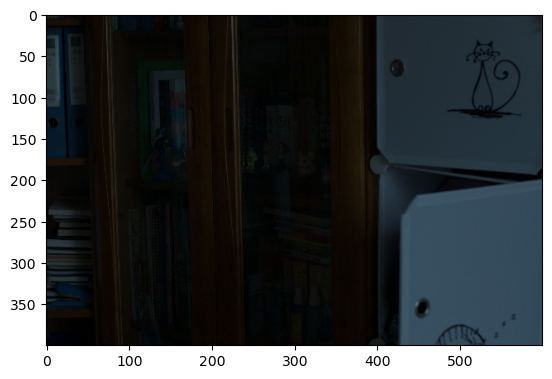

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
x = Image.open('./low/1.png')
plt.imshow(x)

In [13]:
import torchvision.transforms as transforms
transform = transforms.ToTensor()
x = transform(x)

In [27]:
from pytorch_wavelets import DWT1DForward, DWT1DInverse, DWTForward, DWTInverse, DTCWTForward, DTCWTInverse
import torch.nn as nn
dwt = DWTForward(J=1, mode = 'zero', wave='haar')

import pywt
#pywt.dwt2(x, 'haar', 'zero')
def dwt_pywt(x):
    return pywt.dwt2(x, 'haar', 'zero')

import torch
def dwt_init(x): 
    x01 = x[:, :, 0::2, :] / 2
    x02 = x[:, :, 1::2, :] / 2
    x1 = x01[:, :, :, 0::2]
    x2 = x02[:, :, :, 0::2]
    x3 = x01[:, :, :, 1::2]
    x4 = x02[:, :, :, 1::2]
    x_LL = (x1 + x2 + x3 + x4)
    
    x_HL = -x1 - x2 + x3 + x4
    x_LH = -x1 + x2 - x3 + x4
    x_HH = x1 - x2 - x3 + x4
    # print(x_HH[:, 0, :, :])
#     return torch.cat((x_LL, x_HL, x_LH, x_HH), 1)
    return x_LL, x_HL, x_LH, x_HH


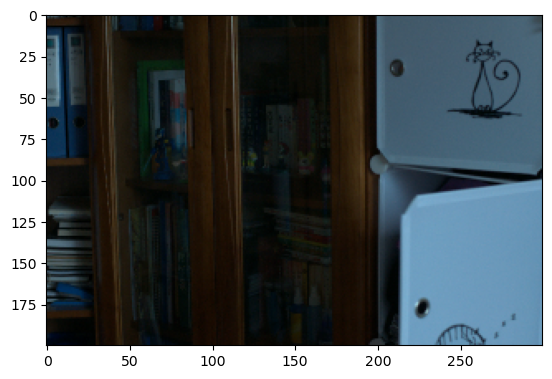

In [29]:
LL1, high1 = dwt(x.unsqueeze(0))
plt.imshow(LL1[0].permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


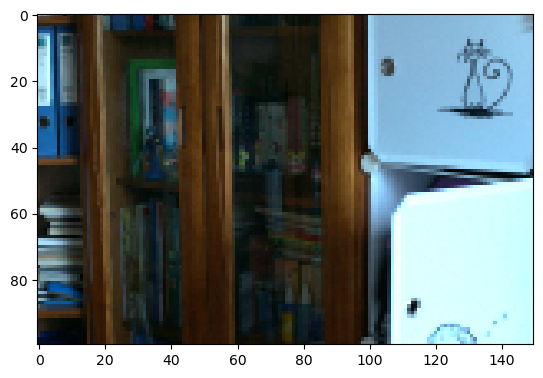

In [30]:
LL2, high2 = dwt(LL1)
plt.imshow(LL2[0].permute(1,2,0).numpy())

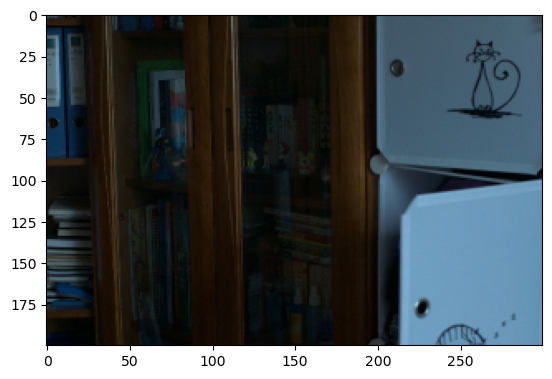

In [34]:
#另一个函数
x_LL, _, _, _ = dwt_init(x.unsqueeze(0))
plt.imshow(x_LL[0].permute(1,2,0).numpy())

In [36]:
import torch
import torch.nn as nn

# Create an input tensor with shape (N, C, H, W)
input_tensor = torch.randn(1, 12, 64, 64)

# Define the upscale factor
upscale_factor = 4

# Create a PixelUnshuffle layer
pixel_unshuffle = nn.PixelUnshuffle(upscale_factor)

# Apply PixelUnshuffle to the input
output = pixel_unshuffle(input_tensor)

print(output.shape)  # Print the shape of the output


torch.Size([1, 192, 16, 16])
